# Approach to a solution

This file contains one way of approaching the exercise. Note that especially in the analysis part, you can of course add much more stats or visualizations of your choosing. So this by no means is the one-and-only solution....

And of course, there are many more (and potentially better) analyses you could make...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# If you want to see how to get from wozwaarde.csv to wozwaarde-clen.csv, have a look at clean.py"

df = pd.read_csv("wozwaarde-clean.csv")

In [3]:
df_long = df.melt(id_vars=['wijk', 'code', 'stadsdeel'],
                  var_name='year',
                  value_name='wozwaarde')    
                  # we could also include value_vars=['2014', '2015', ...] but we don't have to
                  # as we want all remaining variables to be transformed

In [4]:
df_long

,wijk,code,stadsdeel,year,wozwaarde
0,Burgwallen-Oude Zijde,A00,Centrum,2014,263417.0
1,Burgwallen-Nieuwe Zijde,A01,Centrum,2014,267895.0
2,Grachtengordel-West,A02,Centrum,2014,490251.0
3,Grachtengordel-Zuid,A03,Centrum,2014,469946.0
4,Nieuwmarkt/Lastage,A04,Centrum,2014,295239.0
...,...,...,...,...,...
485,"Bijlmer-Oost (E,G,K)",T94,Zuidoost,2018,182291.0
486,Nellestein,T95,Zuidoost,2018,170441.0
487,Holendrecht/Reigersbos,T96,Zuidoost,2018,181189.0
488,Gein,T97,Zuidoost,2018,199542.0


## Get second dataset and clean up a bit

In [5]:
df2 = pd.read_excel("https://cms.onderzoek-en-statistiek.nl/uploads/2021_jaarboek_2112_28485510ff.xlsx",
                   skiprows=2,
                   skipfooter=2)
df2.drop([0,9], inplace=True)  # drop empty line and total
df2

,stadsdeel,2016,2017,2018,2019,2020,2021
1,A Centrum,86499.0,86422.0,86851.0,86862.0,87310.0,87083.0
2,B Westpoort,200.0,192.0,198.0,177.0,106.0,145.0
3,E West,143964.0,143842.0,144210.0,145908.0,147421.0,148030.0
4,F Nieuw-West,149397.0,151677.0,155781.0,157964.0,160124.0,159522.0
5,K Zuid,143258.0,144432.0,145548.0,145966.0,146291.0,145301.0
6,M Oost,132421.0,135767.0,137454.0,140300.0,142049.0,141453.0
7,N Noord,92917.0,94766.0,96275.0,97200.0,99238.0,100887.0
8,T Zuidoost,86057.0,87854.0,87999.0,88610.0,89841.0,90076.0


In [6]:
# The first function you don't really need if we match on the name
# but many of you wanted it, and we used that logic in `clean.py`
def get_code(s):
    return s.split()[0]

def get_name(s):
    return s.split()[-1]

# now, let's apply the  function:
df2['stadsdeel'] = df2['stadsdeel'].apply(get_name)

In [7]:
# Tip: if you find it difficult to understand what such a function does, just try it out:
print(get_code("A This is a test"))
print(get_code("B West"))
print(get_name("A This is a test"))  # you see why you only get 'test' back here, right?
print(get_name("B West"))

A
B
test
West


In [8]:
# The previous command is equivalent to using a throwaway function (lambda function) that is defined on the spot
# instead of creating a named function first:
# df2['stadsdeel'] = df2['stadsdeel'].apply(lambda s: s.split()[-1])

In [9]:
# let's just consider the number of inhabitants in 
# 2018 for the purpose of this exercise
df2['population'] = df2[2018]

# our fully merged dataset:
df = df_long.merge(df2[['stadsdeel','population']], how='left', on='stadsdeel')
# maybe also save it:
df.to_csv("merged.csv")

In [10]:
df

,wijk,code,stadsdeel,year,wozwaarde,population
0,Burgwallen-Oude Zijde,A00,Centrum,2014,263417.0,86851.0
1,Burgwallen-Nieuwe Zijde,A01,Centrum,2014,267895.0,86851.0
2,Grachtengordel-West,A02,Centrum,2014,490251.0,86851.0
3,Grachtengordel-Zuid,A03,Centrum,2014,469946.0,86851.0
4,Nieuwmarkt/Lastage,A04,Centrum,2014,295239.0,86851.0
...,...,...,...,...,...,...
485,"Bijlmer-Oost (E,G,K)",T94,Zuidoost,2018,182291.0,87999.0
486,Nellestein,T95,Zuidoost,2018,170441.0,87999.0
487,Holendrecht/Reigersbos,T96,Zuidoost,2018,181189.0,87999.0
488,Gein,T97,Zuidoost,2018,199542.0,87999.0


## Some analysis

Again, just some inspiration...



In [11]:
df.describe()

,wozwaarde,population
count,4.780000e+02,490.000000
mean,2.856571e+05,126559.846939
std,1.369124e+05,29021.260717
min,7.813700e+04,198.000000
25%,1.914288e+05,96275.000000
50%,2.516580e+05,144210.000000
75%,3.329392e+05,145548.000000
max,1.003743e+06,155781.000000


In [12]:
df.groupby('stadsdeel')['wozwaarde'].agg([np.mean, np.median])
# if you want to, you can also select before grouping,
# but then, you need to first keep the grouping variable of course:
# df.loc[:,['stadsdeel','wozwaarde']].groupby('stadsdeel').agg([np.mean, np.median])

,mean,median
stadsdeel,,
Centrum,391529.640000,352421.0
Nieuw-West,216362.563380,191464.0
Noord,241600.837838,208055.5
Oost,263990.485714,269004.0
West,285322.500000,266207.0
Westpoort,206946.500000,206946.5
Zuid,394134.291139,310248.0
Zuidoost,161416.062500,150385.0


<AxesSubplot:xlabel='stadsdeel'>

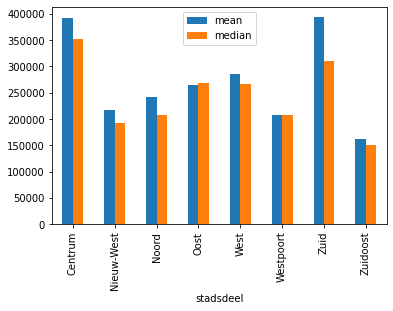

In [13]:
# given that we calculated the values anyway, we can also directy plot 
# them with matplotlib if we want to:
df.groupby('stadsdeel')['wozwaarde'].agg([np.mean, np.median]).plot.bar()

<AxesSubplot:xlabel='stadsdeel', ylabel='wozwaarde'>

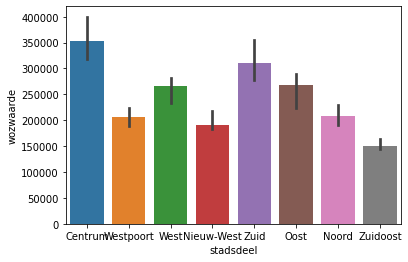

In [14]:
# alternative approach with seaborn:
sns.barplot(x='stadsdeel', y='wozwaarde', estimator=np.median, data=df)

### Over-time developments and differences per 'stadsdeel' and/or per 'wijk'

<AxesSubplot:xlabel='year', ylabel='wozwaarde'>

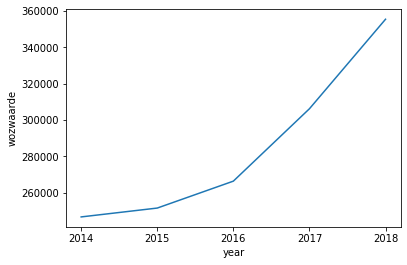

In [15]:
sns.lineplot(x="year", y="wozwaarde", data = df)

<AxesSubplot:xlabel='year', ylabel='wozwaarde'>

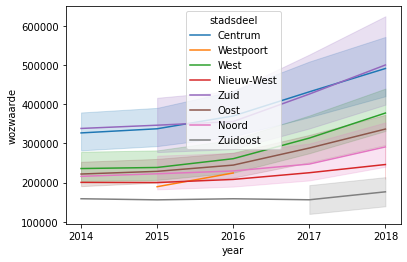

In [16]:
sns.lineplot(x="year", y="wozwaarde", hue = "stadsdeel", data = df)

(0.0, 639802.3349441964)

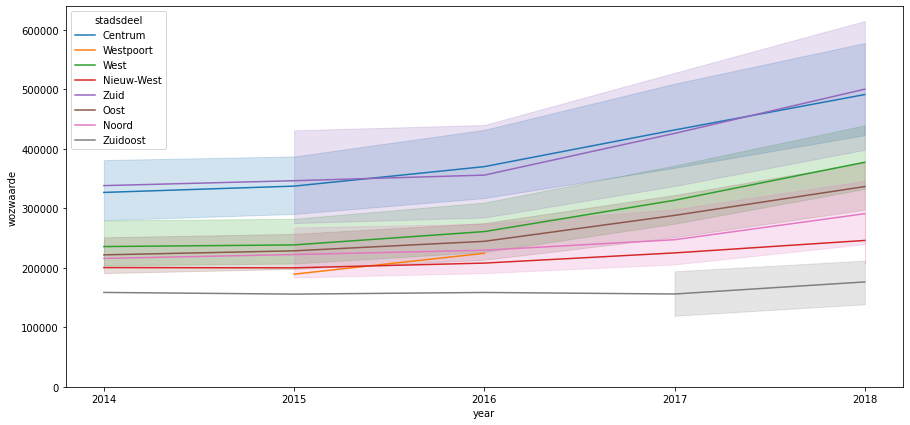

In [17]:
# Or a bit nicer

fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="wozwaarde", hue = "stadsdeel", data=df, ax=ax)
ax.set_ylim(bottom=0)

#### Let's zoom in!
Oost only?

Text(0.5, 1.0, "Development of the WOZ-waarde of different 'wijken' in Oost")

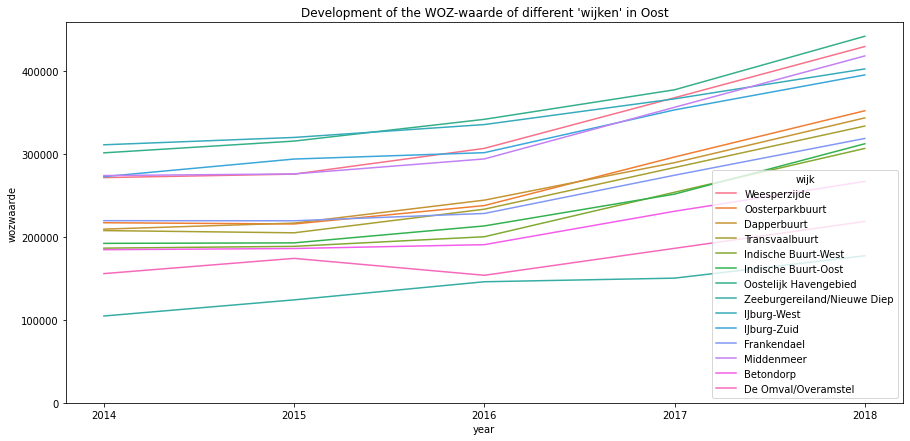

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="wozwaarde", hue = "wijk", data=df[df.loc[:,"stadsdeel"]=="Oost"], ax=ax)
ax.set_ylim(bottom=0)
ax.set_title("Development of the WOZ-waarde of different 'wijken' in Oost")

### Is there a relationship between the population and the prices?

Not really maybe?

<AxesSubplot:xlabel='population'>

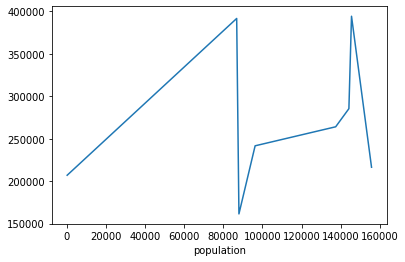

In [19]:
df.groupby("population")['wozwaarde'].mean().plot()